In [40]:
import pandas as pd
import csv
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
lr = LinearRegression()

In [3]:
data = pd.read_csv('filteredgss.csv', low_memory=False)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Columns: 114 entries, caseid to helpblk
dtypes: float64(17), int64(4), object(93)
memory usage: 13.1+ MB


In [5]:
data.head()

,caseid,year,age,sex,race,hispanic,uscitzn,educ,paeduc,maeduc,...,news,tvhours,racdif1,racdif2,racdif3,racdif4,helppoor,helpnot,helpsick,helpblk
0,1614,1973,54.0,Male,White,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1615,1973,51.0,Female,White,NaN,NaN,8,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1616,1973,36.0,Female,White,NaN,NaN,11,12.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1617,1973,32.0,Male,White,NaN,NaN,12,8.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1618,1973,54.0,Female,White,NaN,NaN,8,6.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


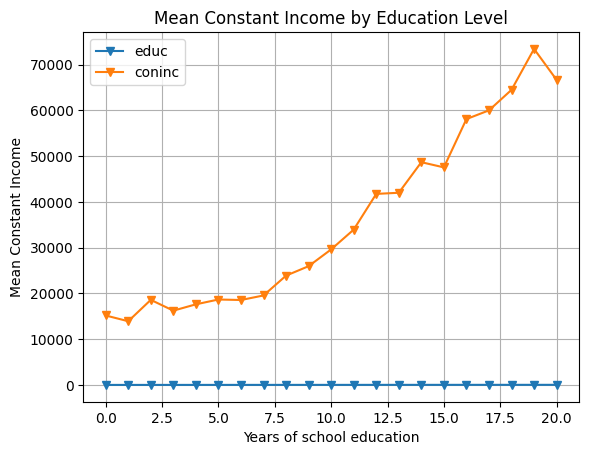

In [15]:
mean_coninc_by_educ = data.groupby('educ')['coninc'].mean().reset_index()
mean_coninc_by_educ.plot(kind='line', marker='v')
plt.xlabel('Years of school education')
plt.ylabel('Mean Constant Income')
plt.title('Mean Constant Income by Education Level')
plt.grid(True)
plt.show()

### KNOWING THAT EDUCATION AND INCOME ARE IMPORTANT TO DETERMINE THE PROBABILITY FOR A PERSON TO OWN A GUN AT HOME, AND KNOWING BOTH HAVE A LINEAR RELATIONSHIP, IT´S IMPORTANT TO DETERMINE A FORMULA TO APROXIMATE THE INCOME GIVEN THE EDUCATION.

In [16]:
X = mean_coninc_by_educ[['educ']]
y = mean_coninc_by_educ['coninc']

In [18]:
model = LinearRegression()
model.fit(X, y)
coef = model.coef_[0]
intercept = model.intercept_
print(f'Coeficiente: {coef}')
print(f'Intercepción: {intercept}')

Coeficiente: 3042.5436426455894
Intercepción: 5493.335423273918


## THE FORMULA TO PREDICT THE INCOME ACCORDING TO THE DATA IS:
## INCOME = (YEARS OF FORMAL EDUCATION)*3042.5436426455894 + 5493.335423273918

In [42]:
education = 15 #EDUC INPUT
educ_level = np.array([[education]])

In [43]:
predicted_coninc = model.predict(educ_level)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [44]:
predicted_coninc_rounded = round(predicted_coninc[0], 2)
print(f'THE INCOME PREDICTION FOR {education} YEARS OF FORMAL EDUCATION IS: ${predicted_coninc_rounded}')

THE INCOME PREDICTION FOR 15 YEARS OF FORMAL EDUCATION IS: $51131.49


In [45]:
def predict_educ_given_income(income, coef, intercept):
    educ = (income - intercept) / coef
    return educ
income_level = 51131.49  #CONINC INPUT
predicted_educ = predict_educ_given_income(income_level, coef, intercept)
predicted_educ_rounded = round(predicted_educ, 0)
print(f'THE NUMBER OF YEARS OF YEARS OF FORMAL EDUCATION FOR AN INDIVIDUAL WHO EARNS ${income_level} WOULD BE: {predicted_educ_rounded}')

THE NUMBER OF YEARS OF YEARS OF FORMAL EDUCATION FOR AN INDIVIDUAL WHO EARNS $51131.49 WOULD BE: 15.0
